# Active Learning Subsampling Example Workflow
This workflow is setup to install all necessary libraries and run active learning subsampling on the BBBP dataset as an example. You should be able to run this workflow out of the box in a fresh conda environment or on Google Colab.

### Install necessary libraries and load code from GitHub

In [1]:
###################
# Install AL subsampling package
%%capture
!pip install git+https://github.com/RekerLab/active-subsampling.git
from active_subsampling import ALSubsampling

### Load code, dataset, and initialize model and metric

In [ ]:
#load data
%%capture
import deepchem as dc
tasks, data, transformers = dc.molnet.load_bbbp(splitter=None)
bbbp = data[0]

In [3]:
# initialize model and performance metric
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.ensemble import RandomForestClassifier as RF
model = RF()
metric = mcc

### Run active learning subsampling workflow

In this example, we will only run a single replicate for time efficiency reasons. We will incorporate 30% error in the training data through label flipping to highlight the robustness of active learning to erroneous data. 


In [4]:
# run active learning subsampling with error
%%capture
result = ALSubsampling.al_subsampling_with_error(model, bbbp, metric, 0.3, 1)

### Data analysis
After the active learning run is complete, we can feed the result to various functions to extract the "maxIter" iteration and calculate "delta Performance".
 

In [5]:
#extract MaxIter iteration 
maxiter = ALSubsampling.calc_maxIter(result)
print("Maximum performance is achieved at iteration " +
  str(maxiter))
print("This is using only " +
  str(round(float(maxiter) / len(result[0][0]) * 100)) +
  "% of the training data.")

# and delta Performance
dPerf = round(ALSubsampling.calc_deltaPerformance(result),2) 
print("The difference in MCC performance between a model trained " +
  "on the active learning subset and the complete dataset is: " + 
  str(dPerf))

Maximum performance is achieved at iteration 136
This is using only 13% of the training data.
The difference in MCC performance between a model trained on the active learning subset and the complete dataset is: 0.19


We can subsequently plot the model performance on the test split and visualize the learning curve. Highlighting the "maxIter" iteration shows the peak performance of the model before performance decreases again.

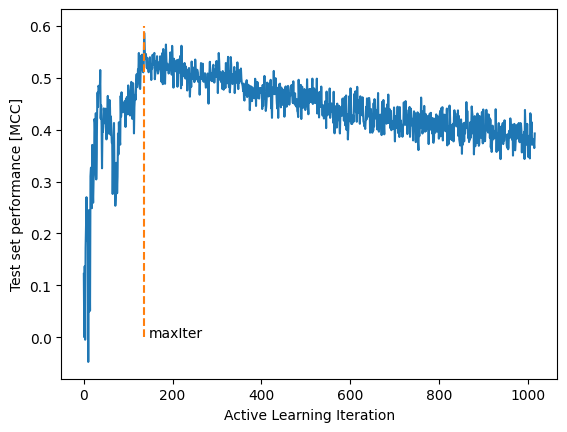

In [6]:
import matplotlib.pylab as pl
import numpy as np
pl.plot(np.mean(result[0],axis=0))
pl.plot([maxiter,maxiter],[0.0,0.6],'--')
pl.text(maxiter+10,0.0,"maxIter")
pl.xlabel("Active Learning Iteration")
pl.ylabel("Test set performance [MCC]")
pl.show()

### Extraction of data sample
The data subset sampled by active learning to achieve maximum performance can then be extracted using the ''subsample_data'' function. This function returns a tuple of SMILES and labels that can be used as training data for a machine learning algorithm. 

In [7]:
# extract AL subsample data
subsample = ALSubsampling.subsample_data(result)
print(subsample)

(array(['[C@H]24[C@H]1[C@@]([C@@H](C(CO)=O)[C@@H](C1)C)(C[C@@H]([C@@H]2[C@@]3(C(=CC(=O)C=C3)[C@H](C4)F)C)O)C',
       'CCC(=O)O[C@H]1[C@@H](C)[C@@H](C)OC(=O)C(C)[C@@H](O[C@H]2C[C@H](OC)[C@@H](OC(=O)CC)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]3O[C@H](C)C[C@@H]([C@H]3O)N(C)C)C(C)C[C@@]4(CO4)C(=O)[C@@H]1C',
       'CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(OC)[C@@H](O)[C@H](C)O2)[C@H](C)[C@@H](O[C@@H]3O[C@H](C)C[C@@H]([C@H]3O)N(C)C)[C@](C)(O)C[C@@H](C)C(=O)[C@H](C)[C@@H](O)[C@]1(C)O',
       'COC1CC(OC(C)C1O)O[C@H]2[C@H](C)[C@@H](OC3OC(C)CC(C3O)N(C)C)[C@@H](C)C[C@]4(CO4)C(=O)[C@H](C)[C@@H](O)[C@@H](C)[C@@H](C)OC(=O)[C@@H]2C',
       'CNC1C(O)C(OCC1(C)O)OC2C(O)C(OC3OC(CN)C(O)C(O)C3O)C(N)CC2NC(=O)C(O)CN',
       '[C@H]34[C@H]2[C@@](F)([C@@]1(C(=CC(=O)C=C1)CC2)C)[C@@H](O)C[C@@]3([C@](O)([C@H](O)C4)C(=O)C)C',
       'C[C@@H]1O[C@H](C[C@H](N)[C@@H]1O)O[C@H]2C[C@@](O)(Cc3c(O)c4C(=O)c5ccccc5C(=O)c4c(O)c23)C(C)=O',
       'C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl',
       '[C@H]3([N]2C1=C(C(=NC=N1)N)